In [ ]:
"""
My project utilized the end-to-end business problem obtained from the Elective Course 1 (MS AI: Natural Language Processing (NLP)) using Python 
programming with Simplilearn. The goal of my work is to show my coding skills with understandable results using the problem under this course. 

"""


In [ ]:
"""

# Project Title:

Help Twitter Combat Hate Speech Using Natural Language Processing (NLP) and Python Machine Learning

# Project Overview:
Users share perspectives and ideas in social media such as twitter. some tweets sadly indicate hate including partiality. There is a critical
issue to classifying and handling high-volume content. Working as a data scientist in twitter, the project goal is to programmatically recognize
and label tweets using Machine Learning (ML), and Natural Language Processing (NLP). Finally, twitter is safely categorized into hate or not content. 


"""

In [ ]:
"""
# Key Tools: 

•	Coding language: Python,
•	Workspace: Jupyter Notebook, 
•	Libraries used: dotenv, NumPy, Pandas, , scikit-learn, NLTK
•	ML Model: Logistic Regression with key parameters (regularization and class weight)
•	NLP tools: dropping stopwords, tokenization, lemmatization, vectorization with tf-idf
•	Model Tuning: stratifiedkfold with cross validation, gridsearchcv with hyperparameter tuning
•	Evaluation Parameters: accuracy, recall, f1-score


"""

In [ ]:
"""
# Primary Goal:
Main goal in this project is to make an fine-tuned natural language classification model and then correctly predict hate speech (racist or not) 
in tweets. I used the following seps to get this goal. 
•	Cleaning original text in tweet using NLP,
•	Normalizing original text in tweet using NLP,
•	Changing text into numerical form with the help of tf-idf
•	Training logistic regression model
•	Tuning logistic regression model
•	Refining logistic regression parameters
•	Quantifying model outcomes with accuracy, recall and f1-score used for hate speech detection. 

"""

In [ ]:
"""
Major Contributions:
I built a tweet NLP preprocessing workflow to drop hashtags, urls, and non-alphanumeric symbols, and mentions. The keys are 
•	Engineered tweet cleaning pipeline used to remove urls, mentions, hashtags, and non-textual characters,
•	Leveraged nltk for tokenization,
•	Adopted tf-idf upto 5000 items,
•	Handled uneven class ratios with a parameter (class_weight = ‘balanced’),
•	Carried out GridSearchCV with StratifiedKFold used for configuration parameters to get reliable outcomes, 
•	 Secured reliable model outcomes after strengthened f1-score as well as recall for maximization results with very low number of hate tweets missed. 

"""

### Load the tweets file 

In [1]:
# Load pandas library
import pandas as pd

# Load and read the dataset

tweets_data   =   'TwitterHate.csv'

df    =   pd.read_csv(tweets_data)

# data structure
print("Data Structure:\n",         df.head())

Data Structure:
    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [5]:
# columns names conformation
columns_names = {'id', 'label','tweet'}
if not columns_names.issubset(set(df.columns)):               #  no error means moving into next steps. 
    raise ValueError(f'Expectated columns are only {columns_names}, columns in the given dataset are {set(df.columns)}')


In [7]:
# Basic check
print('number of rows and columns:\n' , df.shape)


number of rows and columns:
 (31962, 3)


In [9]:
# count number of non-hate and hate text in the tweet
# do not normalize the dataset now.

print('tweet labels:\n', df['label'].value_counts(normalize = False))



tweet labels:
 label
0    29720
1     2242
Name: count, dtype: int64


In [13]:
# control to number of tweets for just view. 

# want to see same three tweets when this cell runs

random_tweets = 101
print('three tweets only:\n', df['tweet'].sample(3, random_state = random_tweets).tolist())



three tweets only:
 ["73-9 ain't mean a thing without a ring.  ", ' @user on our way to the #cmtredcarpet â\x9c¨   #tunein @user @user ', 'ð\x9f\x94\x9d #love #instagood #photooftheday top.tags #tbt #cute #me #beautiful #followme   #followâ\x80¦ ']


### Get the tweets into a list for easy text cleanup and manipulation.

In [15]:
# replace each NaN value with an empty string.
# each item is in the string form.
# want to see all items in a list of strings.   
# these steps are particularly necessary for this problem.

original_tweets = df['tweet'].fillna('').astype(str).tolist()
print("original tweets:\n", original_tweets[:4])        # see only first 4 tweets


original tweets:
 [' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ']


In [17]:
# take labels from the dataset and put into numpy array. 
y = df['label'].astype(int).values

print(y.shape)

print()

print(y[:25])


(31962,)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0]


### take some actions for cleaning tweets. 

In [21]:
import  nltk
# load stopwords in English
from nltk.corpus import stopwords
stopwords_english = set(stopwords.words('english'))
print( "A list of stopwords in English:\n",   stopwords_english)


A list of stopwords in English:
 {'both', 'd', 'we', 'shan', 'with', 'these', 'weren', "shan't", 'few', "he'll", "isn't", "he's", 'only', "it'll", "needn't", 'before', "didn't", 'are', 'has', 'above', 's', 'there', 'should', 'an', 'what', "i'm", 'himself', "hadn't", "doesn't", 'her', "hasn't", "won't", 'haven', 'and', 'me', "they've", 'wouldn', 'some', "we'll", 'itself', 'you', 'just', "you'd", 'but', 'from', 'after', 'doing', 'our', 'hers', 'mightn', 'having', 'will', "we've", 'is', 'ours', "wouldn't", 'most', 'too', 'more', 'have', "mightn't", 'over', 'which', 'theirs', 'any', 'nor', 'out', 'again', "she'll", "it'd", 'didn', 'themselves', "weren't", 'do', 'same', 'its', 'll', 'can', 'was', 'not', 'be', "haven't", 'the', 'all', "i've", 'shouldn', 'down', 'where', 'your', "she'd", 'until', 'his', 'as', "they're", 'when', 'no', 'i', "shouldn't", "you're", 'further', 'him', 'by', 'during', 'that', 'ma', 'mustn', 'yourself', 'does', "wasn't", 'so', 'because', 'isn', 'against', 'aren', 'he

In [23]:
# you can remove some tweet tokens such as  'amp', 'rt etc if they do not play key role to your model prediction. 
# Add these tokens into stopwords_english. 

tweet_stopwords = {'amp', 'rt'}
stopwords_english.update(tweet_stopwords)

print('updated list of stopwords:\n', stopwords_english)

print()

print(len(stopwords_english))


updated list of stopwords:
 {'both', 'd', 'we', 'shan', 'with', 'these', 'weren', "shan't", 'few', "he'll", "isn't", "he's", 'only', "it'll", "needn't", 'before', "didn't", 'are', 'has', 'above', 's', 'there', 'should', 'rt', 'an', 'what', "i'm", 'himself', "hadn't", "doesn't", 'her', "hasn't", "won't", 'haven', 'and', 'me', "they've", 'wouldn', 'some', "we'll", 'itself', 'you', 'just', "you'd", 'but', 'from', 'after', 'doing', 'our', 'hers', 'mightn', 'having', 'will', "we've", 'is', 'ours', "wouldn't", 'most', 'too', 'more', 'have', "mightn't", 'over', 'which', 'theirs', 'any', 'nor', 'out', 'again', "she'll", "it'd", 'didn', 'themselves', "weren't", 'do', 'same', 'its', 'll', 'can', 'was', 'not', 'be', "haven't", 'the', 'all', "i've", 'shouldn', 'down', 'where', 'your', "she'd", 'until', 'his', 'as', "they're", 'when', 'no', 'i', "shouldn't", "you're", 'further', 'him', 'by', 'during', 'that', 'ma', 'mustn', 'yourself', 'does', "wasn't", 'so', 'because', 'isn', 'against', 'aren', 'h

In [25]:
#  (strip_handles = False): do not remove token like @Joan
# (reduce_len = True): decrease repeating characters.  Example, “sooooo” to “soo”. 

from nltk.tokenize import TweetTokenizer

# do not change the parameters names (strip_handles and  reduce_len). There are some valid reasons.
tweettokenizer_tokens = TweetTokenizer(reduce_len = True, strip_handles = False)


In [29]:

# import regular expressions (re)
import re

In [31]:
# drop @any_attached from tweet column. 
reg_exp_user = re.compile(r'@\w+')    # remove all characters immediately followed @. For example, @name, @Tim4


# check if not sure

# drop @any_attached from tweet column
cleaned_tweets = [reg_exp_user.sub('', tweet) for tweet in original_tweets]
print(cleaned_tweets[:8])


['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation', '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ', '  camping tomorrow        dannyâ\x80¦', "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"]


In [38]:
# remove the symbol ('#') from all tweets
remove_hash_symbol = re.compile(r'#')

# drop '#' only from tweet column
remove_hash_symbol_clean = [remove_hash_symbol .sub('', tweet) for tweet in original_tweets]
print(remove_hash_symbol_clean [:8])


[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run', "@user @user thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx.    disapointed getthanked", '  bihday your majesty', 'model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    motivation', '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. allshowandnogo  ', ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦', "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad school exams   hate imagine actorslife revolutionschool girl"]


In [40]:
# drop extra spaces between words
drop_extra_space = re.compile(r'\s+') 

# drop extra spaces only from tweet column
drop_extra_space_clean = [drop_extra_space.sub('', tweet).strip() for tweet in original_tweets]
print(drop_extra_space_clean [:8])


['@userwhenafatherisdysfunctionalandissoselfishhedragshiskidsintohisdysfunction.#run', "@user@userthanksfor#lyftcreditican'tusecausetheydon'tofferwheelchairvansinpdx.#disapointed#getthanked", 'bihdayyourmajesty', '#modeliloveutakewithuallthetimeinurð\x9f\x93±!!!ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'factsguide:societynow#motivation', '[2/2]hugefanfareandbigtalkingbeforetheyleave.chaosandpaydisputeswhentheygetthere.#allshowandnogo', '@usercampingtomorrow@user@user@user@user@user@user@userdannyâ\x80¦', "thenextschoolyearistheyearforexams.ð\x9f\x98¯can'tthinkaboutthatð\x9f\x98\xad#school#exams#hate#imagine#actorslife#revolutionschool#girl"]


In [42]:
# drop “urls
drop_urls = re.compile(r'(http[s]?://\S+)|(www\.\S+)')

# drop 'urls' only from tweet column
drop_urls_clean = [drop_urls.sub('', tweet) for tweet in original_tweets]
print(drop_urls_clean [:8])


[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation', '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ', ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦', "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"]


In [44]:
# do not drop letters, integers, hash symbol, underscore, whitepace
remove_non_char = re.compile(r'[^A-Za-z0-9#_\s]')

# drop 'urls' only from tweet column
remove_non_char_clean = [remove_non_char.sub('', tweet) for tweet in original_tweets]
print(remove_non_char_clean[:8])


[' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   #run', 'user user thanks for #lyft credit i cant use cause they dont offer wheelchair vans in pdx    #disapointed #getthanked', '  bihday your majesty', '#model   i love u take with u all the time in ur \x85  ', ' factsguide society now    #motivation', '22 huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo  ', ' user camping tomorrow user user user user user user user danny', 'the next school year is the year for exams cant think about that  #school #exams   #hate #imagine #actorslife #revolutionschool #girl']


In [47]:
# define filter tweet comment function for a tweet

def filter_tweet_comment(tweet_omment: str) -> str:
    """
    Take one tweet at time and do the cleaning steps as below 

    """
    tweet_lines = tweet_omment.lower()
    tweet_lines = reg_exp_user.sub(' ', tweet_lines)
    tweet_lines = remove_hash_symbol.sub(' ', tweet_lines)
    tweet_lines = drop_urls.sub(' ', tweet_lines)
    tweet_lines  =  remove_non_char.sub(' ',  tweet_lines )
    tweet_lines = drop_extra_space.sub (' ', tweet_lines).strip()
    
    return tweet_lines


In [49]:
# # see first few uncleaned and cleaned comments in tweets.
for tweet in original_tweets[:7]:
    print('original tweets:', tweet)
    print('List of tweet comments after initial cleaning:' , filter_tweet_comment(tweet), '\n')


original tweets:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
List of tweet comments after initial cleaning: when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run 

original tweets: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
List of tweet comments after initial cleaning: thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked 

original tweets:   bihday your majesty
List of tweet comments after initial cleaning: bihday your majesty 

original tweets: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
List of tweet comments after initial cleaning: model i love u take with u all the time in ur 

original tweets:  factsguide: society now    #motivation
List of tweet comments after initial cleaning: factsguide society now motivation 


In [52]:
""" 
Do three things: 
tokenize tweets, 
drop stopwords,
lemmatize tokens

"""



' \nDo three things: \ntokenize tweets, \ndrop stopwords,\nlemmatize tokens\n\n'

In [59]:
# Initialize once before your function
lemmatizer = WordNetLemmatizer()

In [61]:
import string
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()


def normalize_tweet_words(tweets_word: str) -> list:
    # tokenize tweets words
    tweet_tokens = tweettokenizer_tokens.tokenize(tweets_word)
    # collect tokens after cleaning
    
    normalize_tokens  = []
    
    for word in tweet_tokens:
        if word.isdigit():       # do not take number like ‘145’, and move forward
            continue
            
        # drop word length = 1 if it is not important for text model tuning. 
        if len(word) == 1 and word in string.punctuation:  #   Extra clean up with removing terms having a length of 1 if you want.
            continue
            
        # drop stopwords
        if word in stopwords_english:
            continue
            
        # lemmatize word into root form like working to work. 
        lemmatize_word = lemmatizer.lemmatize(word)
        
        if not lemmatize_word:          #  Do not take other than lemmatize_word. 
            continue
        normalize_tokens.append(lemmatize_word)
    return  normalize_tokens

normalize_tokens = [filter_tweet_comment(tweet) for tweet in original_tweets]

each_tweet_normalize =   [normalize_tweet_words(tweet) for tweet in normalize_tokens]

In [63]:
# let’s check the function (normalize_tweet_words) status with own tweet.
example_tweet_one = 'he!! is? @user for& working$ at* #doll site!1'
normalized_tweet = filter_tweet_comment(example_tweet_one)
print('normalized  tweet:\n', normalized_tweet)              # cleaning process works perfectly. 
print()

# more clean text and get tokens
more_clean_tweet = normalize_tweet_words(normalized_tweet)    # better cleaning process works well. 
print(more_clean_tweet)


normalized  tweet:
 he is for working at doll site 1

['working', 'doll', 'site']


In [65]:
# see first few outputs
for n in range (7):
    print(f' original tweets: {original_tweets[n]}')
    print(f' normalize_tokens: { normalize_tokens [n]}')
    print(f' each_tweet_normalize: { each_tweet_normalize [n]}')
    print()
# expected results after NLP preprocessing. 

 original tweets:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
 normalize_tokens: when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
 each_tweet_normalize: ['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run']

 original tweets: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
 normalize_tokens: thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked
 each_tweet_normalize: ['thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked']

 original tweets:   bihday your majesty
 normalize_tokens: bihday your majesty
 each_tweet_normalize: ['bihday', 'majesty']

 original tweets: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 normalize_tokens: model i love u take 

In [67]:
# generate a result into a string using all processes (tokenization and normalization)
def clean_text_string(original_tweet:str) -> str:
    # use “ filter_tweet_comment” function to clean original tweet
    filter_tweet  = filter_tweet_comment(original_tweet)
    
    # tokenization and normalization
    list_tokens = normalize_tweet_words(filter_tweet )
    
    # connect all tokens
    return ' '.join(list_tokens)
    

In [71]:
# see the first 4 normalized tweets.
for n in range(4):
    print(f'original tweet {n+1}: {original_tweets [n]}')
    print(f'tweet after cleaning {n+1}: { clean_text_string(original_tweets[n])}') 
    print()


original tweet 1:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
tweet after cleaning 1: father dysfunctional selfish drag kid dysfunction run

original tweet 2: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
tweet after cleaning 2: thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked

original tweet 3:   bihday your majesty
tweet after cleaning 3: bihday majesty

original tweet 4: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
tweet after cleaning 4: model love u take u time ur



In [73]:
# show some of the top tokenized items into a list.

list_items = []

for tweet in original_tweets:
    clean_text_string_tweet = clean_text_string(tweet)
    tokens = clean_text_string_tweet.split()
    list_items.extend(tokens)

from collections import Counter
best_items = Counter(list_items).most_common(15)
print('best_items:', best_items)

best_items: [('day', 2872), ('love', 2868), ('u', 1713), ('happy', 1706), ('time', 1261), ('life', 1258), ('like', 1157), ('today', 1105), ('get', 1003), ('new', 1002), ('father', 957), ('thankful', 952), ('positive', 938), ('people', 894), ('good', 875)]


In [74]:
# other way to see result:
for item, count in best_items:
    print(f' {item:20s}: {count}')


 day                 : 2872
 love                : 2868
 u                   : 1713
 happy               : 1706
 time                : 1261
 life                : 1258
 like                : 1157
 today               : 1105
 get                 : 1003
 new                 : 1002
 father              : 957
 thankful            : 952
 positive            : 938
 people              : 894
 good                : 875


In [77]:
X_normalized = [clean_text_string(tweet) for tweet in original_tweets]
# see few normalized tweets
for n in range(min(5, len(X_normalized))):
    print(f'X normalized index {n},  {X_normalized[n]}')


X normalized index 0,  father dysfunctional selfish drag kid dysfunction run
X normalized index 1,  thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked
X normalized index 2,  bihday majesty
X normalized index 3,  model love u take u time ur
X normalized index 4,  factsguide society motivation


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

'''
# make the ML pipeline to transform text into numerical values using  Term Frequency–Inverse Document Frequency (TF-IDF) used for text 
feature extraction and logistic regression model.

'''

ml_pipeline_tfidf_lr = Pipeline( [
        # use unigrams and bigrams (1, 2) with TF-IDF  for a string processing.
        ('TF-IDF-vec', TfidfVectorizer(ngram_range=(1, 2), min_df=4, max_df=0.90)),
        
        # apply L2 regularization (default) in  logistic regression
        ('log-reg-model', LogisticRegression(solver = 'liblinear',  max_iter = 1200,  class_weight = 'balanced')),
] )


In [82]:
# Let's see vocabulary size before cleaning tweet

# before cleaning raw dataset
before_cleaning_raw_dataset = TfidfVectorizer(ngram_range = (1,2), min_df = 4)

before_cleaning_raw_dataset.fit([filter_tweet_comment(tweet) for tweet in original_tweets ])

print('before cleaning raw dataset, vocabulary size:', len(before_cleaning_raw_dataset.vocabulary_))


before cleaning raw dataset, vocabulary size: 18261


In [84]:
# vocabulary size after cleaning raw dataset
before_cleaning_raw_dataset.fit(X_normalized)
print('after cleaning raw dataset, vocabulary size:', len(before_cleaning_raw_dataset.vocabulary_))


after cleaning raw dataset, vocabulary size: 11039


In [86]:
# make a dictionary with parameter names and appropriate values for GridSearchCV
# find a combination of these settings to maximize the pipeline output. 

parameters = {
    "TF-IDF-vec__min_df": [2, 3, 4],
    "TF-IDF-vec__ngram_range": [(1, 1), (1, 2)],
    "log-reg-model__C": [0.01, 0.05, 0.5, 2, 8.0],
}

In [88]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# To get expected results, we need to tune parameters with cross-validation.

# Stratified_kfold
stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# GridSearch

grid_search_cv = GridSearchCV(
    n_jobs=-1,  
    verbose=2, 
    estimator = ml_pipeline_tfidf_lr,  
    scoring="f1", 
    param_grid=parameters,
    cv= stratified_kfold,
)


In [90]:
# fit the X_normalized data using grid_search_cv

grid_search_cv.fit(X_normalized, y)


Fitting 7 folds for each of 30 candidates, totalling 210 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('TF-IDF-vec',
                                        TfidfVectorizer(max_df=0.9, min_df=4,
                                                        ngram_range=(1, 2))),
                                       ('log-reg-model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1200,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'TF-IDF-vec__min_df': [2, 3, 4],
                         'TF-IDF-vec__ngram_range': [(1, 1), (1, 2)],
                         'log-reg-model__C': [0.01, 0.05, 0.5, 2, 8.0]},
             scoring='f1', verbose=2)

In [92]:
# see a list of best parameters extracted from text analysis pipeline.
print('list of best parameters extracted from text analysis pipeline.:\n', grid_search_cv.best_params_)
print()

# find best cross-validation score (average)
print('best cross-validation score (average):\n', grid_search_cv.best_score_)


list of best parameters extracted from text analysis pipeline.:
 {'TF-IDF-vec__min_df': 2, 'TF-IDF-vec__ngram_range': (1, 2), 'log-reg-model__C': 8.0}

best cross-validation score (average):
 0.701820040184149


In [94]:
# cross-validated model evaluation
# find best estimator
best_estimator  =  grid_search_cv.best_estimator_
print(best_estimator)


Pipeline(steps=[('TF-IDF-vec',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
                ('log-reg-model',
                 LogisticRegression(C=8.0, class_weight='balanced',
                                    max_iter=1200, solver='liblinear'))])


In [97]:
from sklearn.model_selection import cross_val_predict

# Use best estimator on whole cleaned dataset for finding cross-validated predictions. 

print('Use best estimator on whole cleaned dataset for finding cross-validated predictions:\n')
y_cross_validation_predictions = cross_val_predict(
    best_estimator, 
    X_normalized, 
    y,
    cv = stratified_kfold,   n_jobs = -1)


Use best estimator on whole cleaned dataset for finding cross-validated predictions:



In [98]:
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

print('confusion matrix:\n', confusion_matrix(y, y_cross_validation_predictions )) 

confusion matrix:
 [[28809   911]
 [  537  1705]]


In [99]:
print('classification report:\n',  classification_report(y, y_cross_validation_predictions))

classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     29720
           1       0.65      0.76      0.70      2242

    accuracy                           0.95     31962
   macro avg       0.82      0.86      0.84     31962
weighted avg       0.96      0.95      0.96     31962



In [103]:
print('model prediction accuracy:\n', accuracy_score(y,  y_cross_validation_predictions))

model prediction accuracy:
 0.9546962017395657


In [106]:
# let’s fit the best model to whole dataset using best_estimator
best_estimator.fit( X_normalized, y)


Pipeline(steps=[('TF-IDF-vec',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
                ('log-reg-model',
                 LogisticRegression(C=8.0, class_weight='balanced',
                                    max_iter=1200, solver='liblinear'))])

### Extra cleanup by removing terms with a length of 1.

In [108]:


def normalize_tweet_words(tweets_word: str) -> list:
    # tokenize tweets words
    tweet_tokens = tweettokenizer_tokens.tokenize(tweets_word)
    # collect tokens after cleaning
    
    normalize_tokens  = []
    
    for word in tweet_tokens:
        if word.isdigit():       # do not take number like ‘145’, and move forward
            continue
            
        # drop word length = 1 if it is not important for text model tuning. 
        if len(word) == 1 and word in string.punctuation:  #   Extra clean up with removing terms having a length of 1 if you want.
            continue

        # take off 1 character tokens
        if len(word) == 1:
            continue
            
        # do not take stopwords
        if word.lower() in stopwords_english:
            continue
                                 
        # lemmatize word into root form like working to work. 
        lemmatize_word = lemmatizer.lemmatize(word)
        
        if not lemmatize_word:          #  Do not take other than lemmatize_word. 
            continue
        normalize_tokens.append(lemmatize_word)
    return  normalize_tokens

normalize_tokens = [filter_tweet_comment(tweet) for tweet in original_tweets]

each_tweet_normalize =   [normalize_tweet_words(tweet) for tweet in normalize_tokens]

In [110]:
# let’s check the function (normalize_tweet_words) status with own tweet.
example_tweet_one = 'he!! is? @user a for&  p working$ at* #doll o site!1'
normalized_tweet = filter_tweet_comment(example_tweet_one)
print('normalized  tweet:\n', normalized_tweet)             # cleaning process works perfectly. 
print()

# more clean text and get tokens
more_clean_tweet = normalize_tweet_words(normalized_tweet)   # better cleaning process works well. 
print(more_clean_tweet)


normalized  tweet:
 he is a for p working at doll o site 1

['working', 'doll', 'site']


In [112]:
# see first few outputs
for n in range (7):
    print(f' original tweets: {original_tweets[n]}')
    print(f' normalize_tokens: { normalize_tokens [n]}')
    print(f' each_tweet_normalize: { each_tweet_normalize [n]}')
    print()
# expected results after NLP preprocessing. 

 original tweets:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
 normalize_tokens: when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
 each_tweet_normalize: ['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run']

 original tweets: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
 normalize_tokens: thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked
 each_tweet_normalize: ['thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked']

 original tweets:   bihday your majesty
 normalize_tokens: bihday your majesty
 each_tweet_normalize: ['bihday', 'majesty']

 original tweets: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 normalize_tokens: model i love u take 

### Check out the top terms in the tweets

In [114]:
# generate a result into a string using all processes (tokenization and normalization)
def clean_text_string(original_tweet:str) -> str:
    # use “ filter_tweet_comment” function to clean original tweet
    filter_tweet  = filter_tweet_comment(original_tweet)
    
    # tokenization and normalization
    list_tokens = normalize_tweet_words(filter_tweet )
    
    # connect all tokens
    return ' '.join(list_tokens)
    

In [116]:
# see the first 4 normalized tweets.
for n in range(4):
    print(f'original tweet {n+1}: {original_tweets [n]}')
    print(f'tweet after cleaning {n+1}: { clean_text_string(original_tweets[n])}') 
    print()


original tweet 1:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
tweet after cleaning 1: father dysfunctional selfish drag kid dysfunction run

original tweet 2: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
tweet after cleaning 2: thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked

original tweet 3:   bihday your majesty
tweet after cleaning 3: bihday majesty

original tweet 4: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
tweet after cleaning 4: model love take time ur



In [119]:
# show some of the top tokenized items into a list.

list_items = []

for tweet in original_tweets:
    clean_text_string_tweet = clean_text_string(tweet)
    tokens = clean_text_string_tweet.split()
    list_items.extend(tokens)

from collections import Counter
best_items = Counter(list_items).most_common(18)
print('best_items:', best_items)

best_items: [('day', 2872), ('love', 2868), ('happy', 1706), ('time', 1261), ('life', 1258), ('like', 1157), ('today', 1105), ('get', 1003), ('new', 1002), ('father', 957), ('thankful', 952), ('positive', 938), ('people', 894), ('good', 875), ('bihday', 873), ('make', 849), ('smile', 846), ('one', 845)]


In [120]:
# other way to see result:
for item, count in best_items:
    print(f' {item:20s}: {count}')


 day                 : 2872
 love                : 2868
 happy               : 1706
 time                : 1261
 life                : 1258
 like                : 1157
 today               : 1105
 get                 : 1003
 new                 : 1002
 father              : 957
 thankful            : 952
 positive            : 938
 people              : 894
 good                : 875
 bihday              : 873
 make                : 849
 smile               : 846
 one                 : 845


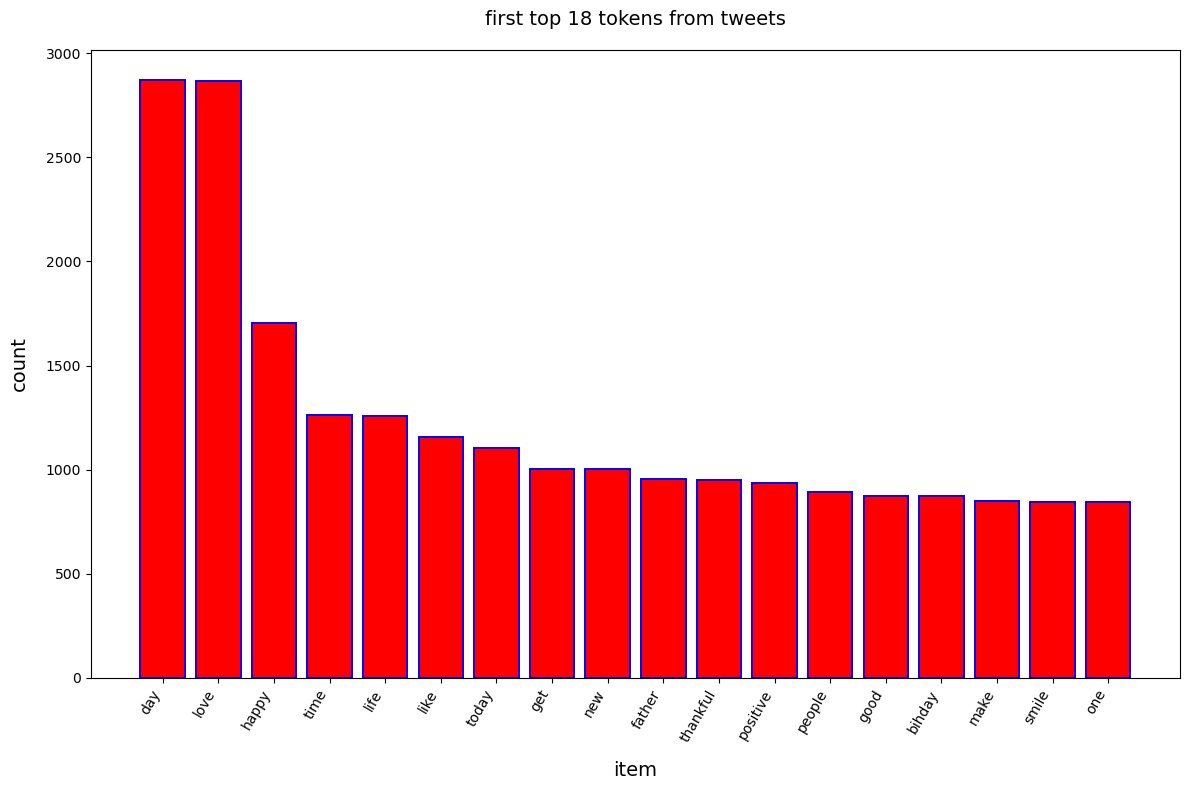

In [123]:
# for a better view of top key words, a simple bar plot is enough. 

import matplotlib.pyplot as plt

# take of each item and corresponding count from the best_items.
item, count = zip(*best_items) 

# use bar plot for better visualization

plt.figure(figsize = (12, 8))

plt.bar(item, count, color = 'red', edgecolor = 'blue', linewidth = 1.4)
plt.ylabel('count', fontsize = 14, labelpad = 12)

plt.xlabel('item', fontsize = 14, labelpad = 12)

plt.xticks(rotation = 60, ha = 'right')
plt.title('first top 18 tokens from tweets', fontsize = 14, pad = 18)

plt.tight_layout()

plt.show()


In [136]:
# load the trained mode
import joblib

load_train_model = joblib.load('whole_model_tweet.joblib')

In [138]:
# make a file using Python’s Path and save in the current directory.

# The file will be named "twitter_hate_model.joblib" and stored in the current working directory.

from pathlib import Path
from joblib import dump


whole_model_tweet = Path('whole_model_tweet.joblib')

# save the model
import joblib
joblib.dump(best_estimator, whole_model_tweet)


['whole_model_tweet.joblib']

In [140]:
# How do I believe my trained model is perfectly functioning? 

example_tweets = [
    'He hate you.',
    'Jack killed Jon?',
    '@Tim go far away.', 
    "@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot"   # One tweet from original dataset   # label = 1
    'they hate to work on field.',
    'He hates you.',
    'Your sister does not like to travel in train.',
    'retweet if you agree!',                            # One tweet from original dataset    # label = 1

]
samples_cleaned = [clean_text_string(tweet) for tweet in example_tweets]

samples_predicted_labels = load_train_model.predict(samples_cleaned)

for tweet, label in  zip(example_tweets, samples_predicted_labels):
    print(f'sample tweet: {tweet}\n,  sample predicted label: {label}\n\n')


sample tweet: He hate you.
,  sample predicted label: 1


sample tweet: Jack killed Jon?
,  sample predicted label: 0


sample tweet: @Tim go far away.
,  sample predicted label: 0


sample tweet: @user #cnn calls #michigan middle school 'build the wall' chant '' #tcotthey hate to work on field.
,  sample predicted label: 1


sample tweet: He hates you.
,  sample predicted label: 1


sample tweet: Your sister does not like to travel in train.
,  sample predicted label: 0


sample tweet: retweet if you agree!
,  sample predicted label: 1




### Check out some of the top terms in the tweets

In [142]:
# show some of the top tokenized items into a list.

list_items = []

for tweet in original_tweets:
    clean_text_string_tweet = filter_tweet_comment(tweet)
    tokens = normalize_tweet_words(clean_text_string_tweet)
    list_items.extend(tokens)

print('total token:\n', len(list_items))

print()

print('first 35 tokens:\n', list_items[:35])


total token:
 243579

first 35 tokens:
 ['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run', 'thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked', 'bihday', 'majesty', 'model', 'love', 'take', 'time', 'ur', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos']


In [144]:
# totalsingular token count
total_tokens_count = Counter(list_items)

print(f'total_tokens_count:{len(total_tokens_count)}')
print()
tokens_count = total_tokens_count.most_common(12)      # 12 tokens

for each_token, count in tokens_count:
    print(f'list of {each_token} tokens:, {count}')

total_tokens_count:35928

list of day tokens:, 2872
list of love tokens:, 2868
list of happy tokens:, 1706
list of time tokens:, 1261
list of life tokens:, 1258
list of like tokens:, 1157
list of today tokens:, 1105
list of get tokens:, 1003
list of new tokens:, 1002
list of father tokens:, 957
list of thankful tokens:, 952
list of positive tokens:, 938


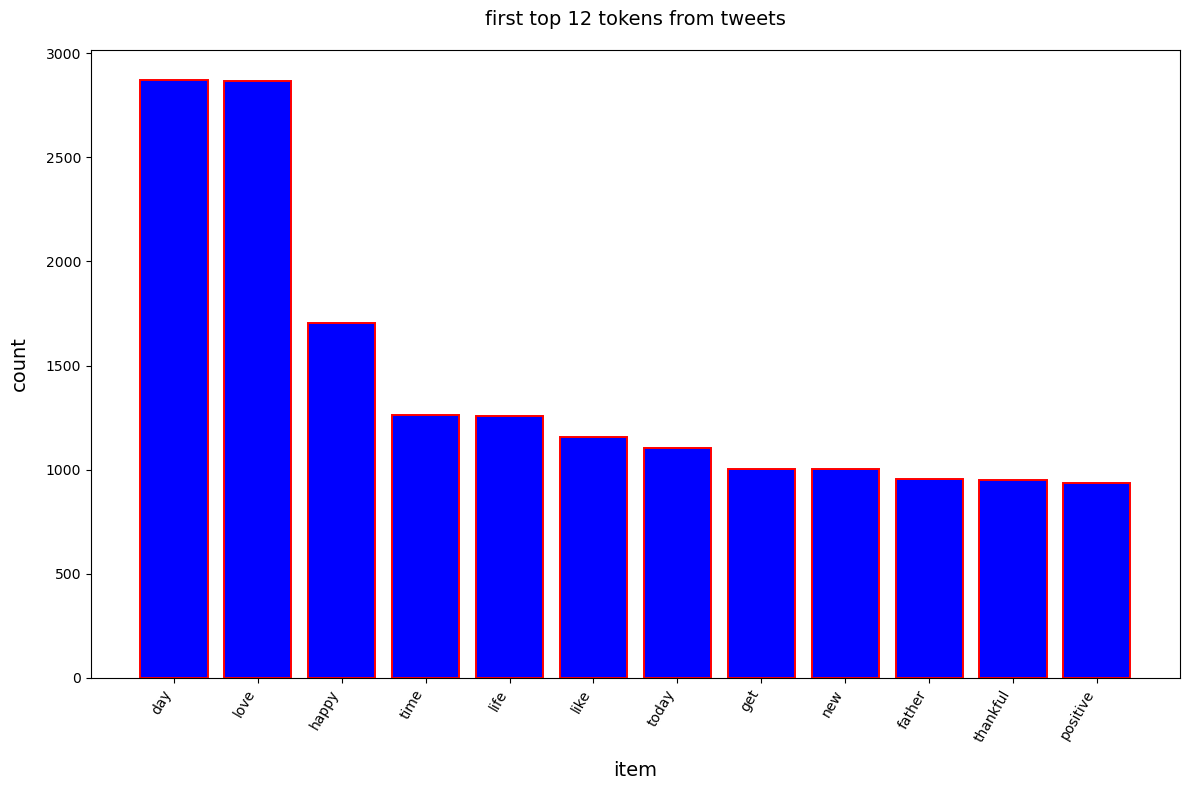

In [146]:
# for a better view of top key words, a simple bar plot is enough. 


# take of each item and corresponding count from the best_items.
item, count = zip(*tokens_count) 

# use bar plot for better visualization

plt.figure(figsize = (12, 8))

plt.bar(item, count, color = 'blue', edgecolor = 'red', linewidth = 1.4)
plt.ylabel('count', fontsize = 14, labelpad = 12)

plt.xlabel('item', fontsize = 14, labelpad = 12)

plt.xticks(rotation = 60, ha = 'right')
plt.title('first top 12 tokens from tweets', fontsize = 14, pad = 18)

plt.tight_layout()

plt.show()

### Data formatting for predictive modeling

In [149]:
# load train_test_split
from sklearn.model_selection import train_test_split

# using pipeline having normalization and cleaning methods to tweets
# use clean_text_string() to clean all raw tweets.

cleaned_all_tweets = [clean_text_string(raw_tweet) for raw_tweet in original_tweets]

# do not want to see elements coming from clean_text_string(raw_tweet)  as a tuple.

cleaned_all_tweets  = [tweet_element[0] if isinstance(tweet_element, tuple) else tweet_element for tweet_element in cleaned_all_tweets] 

# check

print('some clean sample:\n')
for n in range(5):
    print(f'Original tweet: {original_tweets[n]}')

some clean sample:

Original tweet:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Original tweet: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Original tweet:   bihday your majesty
Original tweet: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
Original tweet:  factsguide: society now    #motivation


In [153]:
# Sometimes your clean_text_string() returns a tuple because of a trailing comma  # we need to fix it:
# Ensure all are plain strings
cleaned_tweets = [text[0] if isinstance(text, tuple) else text for text in cleaned_tweets]

for n in range(5):
    print(f'Original tweets: {original_tweets[n]}')
    print(f'weets after cleaning: {cleaned_tweets[n]}')
    print()


Original tweets:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
weets after cleaning:   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run

Original tweets: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
weets after cleaning:   thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked

Original tweets:   bihday your majesty
weets after cleaning:   bihday your majesty

Original tweets: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
weets after cleaning: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

Original tweets:  factsguide: society now    #motivation
weets after cleaning:  factsguide: society now    #motivation



In [155]:
# define a new dataframe. 
import pandas as pd

df_clean = pd.DataFrame({
    'original_tweets': original_tweets, 
    'cleaned_tweets': cleaned_tweets, 
    'label': df['label']  
})

print(df_clean)

# take X features and y labels from df_clean daaframe

# Define features (X) and labels (y)

X = df_clean['cleaned_tweets']

y = df_clean['label']

# split X and y data into two parts (train and test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 42, stratify = y )

# check below
print(f'number of train data: {len(X_train)}')

print()

print(f'number of test data: {len(X_test)}')
print()

print(X_train.iloc[4:7])
print()

print(y_train.iloc[4:7])


                                         original_tweets  \
0       @user when a father is dysfunctional and is s...   
1      @user @user thanks for #lyft credit i can't us...   
2                                    bihday your majesty   
3      #model   i love u take with u all the time in ...   
4                 factsguide: society now    #motivation   
...                                                  ...   
31957  ate @user isz that youuu?ðððððð...   
31958    to see nina turner on the airwaves trying to...   
31959  listening to sad songs on a monday morning otw...   
31960  @user #sikh #temple vandalised in in #calgary,...   
31961                   thank you @user for you follow     

                                          cleaned_tweets  label  
0        when a father is dysfunctional and is so sel...      0  
1        thanks for #lyft credit i can't use cause th...      0  
2                                    bihday your majesty      0  
3      #model  

### We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

In [166]:
# load TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# set up TfidfVectorizer
set_up_tfidfvectorizer  = TfidfVectorizer( max_features = 5500, stop_words = 'english', ngram_range = (1, 2) )

# Fitting with transforming the training dataset
X_train_set_up_tfidf = set_up_tfidfvectorizer.fit_transform(X_train)

# consider transformation used in X_train into X_test

X_test_set_up_tfidf = set_up_tfidfvectorizer.transform(X_test)

print('X train datset shape:\n', X_train_set_up_tfidf.shape) 
# this gives (a, b): (number of tweets (a) to be trained,  number distinct items in tweets (vocabulary) 

# check: can I get expected results? See some examples.
print(" a list of examples:", set_up_tfidfvectorizer.get_feature_names_out()[:20])    #  you see both unigram and bigrams. 


X train datset shape:
 (23971, 5500)
 a list of examples: ['00' '00 shop' '000' '039' '05' '06' '06 16' '08' '10' '10 days' '100'
 '100 amazing' '1000' '10k' '11' '11th' '12' '13' '13th' '14']


### Model building: Ordinary Logistic Regression

In [171]:

logistic_regression_base_model = LogisticRegression(max_iter=800, random_state=42)

# Fit this model with the train dataset.
logistic_regression_base_model.fit(X_train_set_up_tfidf, y_train)

# Make prediction for the train dataset
prediction_y_train = logistic_regression_base_model.predict(X_train_set_up_tfidf)

# Make prediction for the test dataset.
prediction_y_test = logistic_regression_base_model.predict(X_test_set_up_tfidf)


# check y train and y test predictions shape

print(f' prediction in y train : {prediction_y_train.shape}')

print(f'prediction in y test : {prediction_y_test}')


 prediction in y train : (23971,)
prediction in y test : [0 0 0 ... 0 0 0]


### Model evaluation: Accuracy, recall, and f_1 score

In [176]:
# find accuracy_score for some test dataset
from sklearn.metrics import accuracy_score

print('some prediction samples:', prediction_y_test[:30]) 
print()

# find accuracy_score for traint dataset
accuracy_score_train_dataset = accuracy_score(y_train, prediction_y_train)

print(f'accuracy score for train dataset: { accuracy_score_train_dataset:.3f}')
print()

# find accuracy_score for test dataset
accuracy_score_test_dataset = accuracy_score(y_test, prediction_y_test)
print()

print(f'accuracy score for test dataset : { accuracy_score_test_dataset:.3f}')
print()

# take this action if necessary.

if accuracy_score_test_dataset > 0.88:
    print('model is working well')
elif 0.70 <= accuracy_score_test_dataset <= 0.88:
    print('model is ok.')
else:
    print('model is not usable.')



some prediction samples: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

accuracy score for train dataset: 0.956


accuracy score for test dataset : 0.952

model is working well


In [178]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

recall_score_train =  recall_score(y_train, prediction_y_train)
print('recall score for train dataset:\n', recall_score_train)
print()

# check below

f1_score_train = f1_score(y_train, prediction_y_train)
print('f1_score_train;\n', f1_score_train)
print()
if accuracy_score_test_dataset > 0.88:
    print('high')
elif 0.70 <= accuracy_score_test_dataset <= 0.88:
    print('decent')
else:
    print('low')



recall score for train dataset:
 0.388459250446163

f1_score_train;
 0.5510548523206751

high


### adjust the class imbalance in the LogisticRegression model.


In [181]:
# Adjust the appropriate class in the LogisticRegression model.
# solve uneven class distribution using class weigh

logisticregression_model_adjust = LogisticRegression(max_iter=950, random_state=42, class_weight='balanced' )

# fit the above model with the train data obtained from tf-idf

logisticregression_model_adjust.fit(X_train_set_up_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=950, random_state=42)

### train again with the adjustment and evaluate the predictions on the train set

In [187]:
y_train_balance_adjust = logisticregression_model_adjust.predict(X_train_set_up_tfidf)

print(y_train_balance_adjust[:25])

y_test_balance_adjust  = logisticregression_model_adjust.predict(X_test_set_up_tfidf)

print(y_test_balance_adjust[:25])
print()

train_accuracy_score_adjust  =  accuracy_score(y_train, y_train_balance_adjust)
print()

print('train accuracy score adjust:', train_accuracy_score_adjust)

print(f'train accuracy score adjust: {train_accuracy_score_adjust:.3f}')   # professional output writing 
print()

train_recall_score_adjust   = recall_score(y_train, y_train_balance_adjust)
print(f'train recall score adjust: {train_recall_score_adjust:.3f}') 

print()
f1_score_train  = f1_score(y_train, y_train_balance_adjust )
print(f'f1_score of train dataset:{f1_score_train:.3f}') 



[1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


train accuracy score adjust: 0.9461432564348587
train accuracy score adjust: 0.946

train recall score adjust: 0.967

f1_score of train dataset:0.716


### regularization and Hyperparameter tuning

In [190]:


# state parameter grid
parameter_grid = { 'penalty': ['l1', 'l2'], 'C': [0.02, 0.2, 2, 8] } 

# set up logistic regression with including class weight as balanced, and solver as liblinear.
logistic_regression_hyperparameter_tuning = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 900, random_state = 42)

# activate StratifiedKFold cross-validation
stratifiedkfold_cross_validation = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)


# activate GridSearchCV
gridsearch_cv = GridSearchCV( estimator = logistic_regression_hyperparameter_tuning, scoring = 'recall',  param_grid = parameter_grid,   
    cv = stratified_kfold,  verbose = 2,  n_jobs = -1  )


# fit the training dataset with grid search

gridsearch_cv.fit(X_train_set_up_tfidf, y_train)


Fitting 7 folds for each of 8 candidates, totalling 56 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', max_iter=900,
                                          random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.02, 0.2, 2, 8], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=2)

### parameters with the best recall in cross validation

In [193]:
# see the best parameters associated with ‘recall’

print('best parameters associated with recall:',  gridsearch_cv.best_params_)
print()

print(f' best recall score in cross validation: {gridsearch_cv.best_score_:.3f}')



best parameters associated with recall: {'C': 0.2, 'penalty': 'l2'}

 best recall score in cross validation: 0.794


### predict and evaluate using the best estimator.

In [196]:
# Find best estimator using GridSearchCV
best_estimator_model = gridsearch_cv.best_estimator_

# predict the X test dataset

X_test_predict = best_estimator_model.predict(X_test_set_up_tfidf)

# find recall score as well as f1 score

X_test_predict_recall_score = recall_score(y_test, X_test_predict )

print(f'X_test_predict_recall_score: {X_test_predict_recall_score:.3f}')

print()


X_test_f1_score = f1_score(y_test, X_test_predict)

print(f' X_test_f1_score: {X_test_f1_score:.3f}')
print()


X_test_accuracy_score = accuracy_score(y_test,  X_test_predict)
print(f'X_test_accuracy_score: { X_test_accuracy_score:.3f}')



X_test_predict_recall_score: 0.793

 X_test_f1_score: 0.574

X_test_accuracy_score: 0.917


In [ ]:
"""
# Closing Statement:

In this project, I clearly show that Python machine learning and NLP can solve the real-world business problems such as hate speech 
classification (racist or not) in Twitter. With the help of raw data preprocessing, feature engineering, optimization of model response pattern, 
logistic regression model showed unbiased operational success. The pipeline presented here can be used to high-volume datasets as well as
cutting-edge deep learning systems such as BERT, LSTM for real-world operationalization. 

"""